In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("crop_production.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# EDA

In [3]:
# Finding Null Values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<Figure size 1000x600 with 0 Axes>

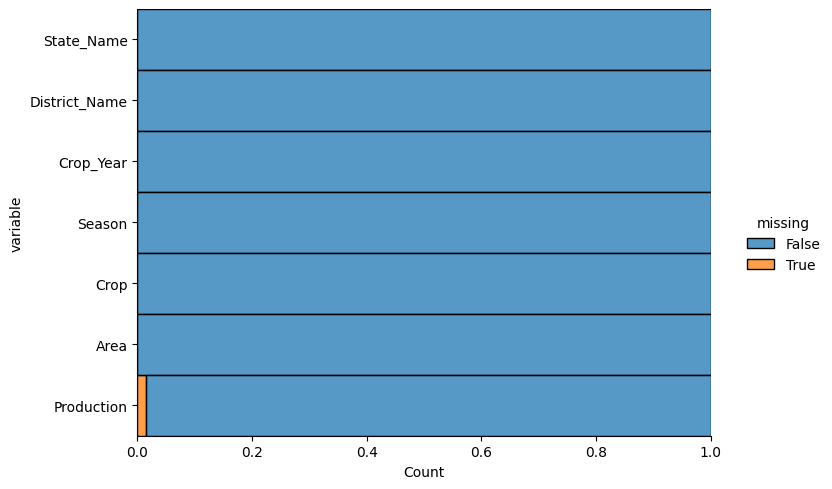

In [4]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)

In [5]:
df['Production'] = df['Production'].fillna(df['Production'].mean())
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
# Finding Null Values
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

<Figure size 1000x600 with 0 Axes>

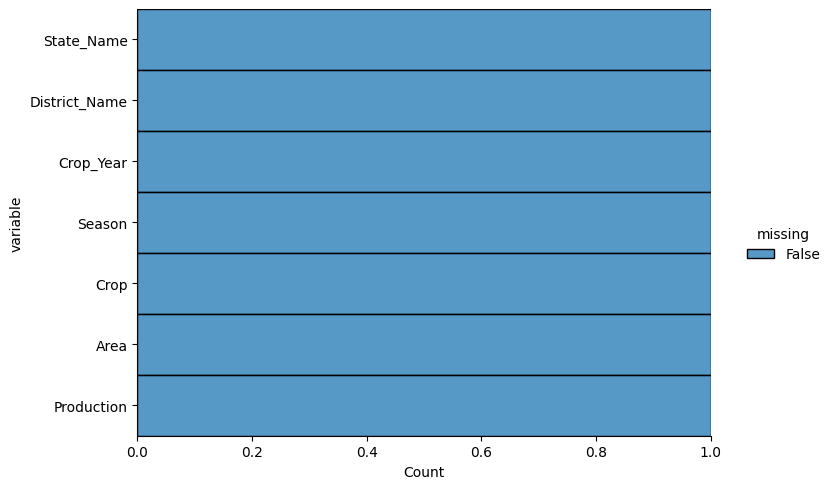

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)

In [8]:
df['Crop'].value_counts()

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Pear                     6
Litchi                   6
Peach                    4
Apple                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

## Filtering dataset

In [9]:
# List of crops to retain
crops_to_keep = [
    "Rice", "Maize", "Gram", "Rajmash Kholar", "Arhar/Tur", 
    "Moth", "Moong(Green Gram)", "Blackgram", "Masoor", "Pome Granet", 
    "Banana", "Mango", "Grapes", "Water Melon", "Other Fresh Fruits", 
    "Apple", "Orange", "Papaya", "Coconut ", "Cotton(lint)", "Jute", 
    "Coffee","Masoor","Urad"
]

# Filter the dataframe
filtered_df = df[df['Crop'].isin(crops_to_keep)]

# Save the filtered dataframe to a new CSV file
filtered_df.to_csv("filtered_crop_production.csv", index=False)

In [10]:
data=pd.read_csv("filtered_crop_production.csv")
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
3,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.0
4,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0
...,...,...,...,...,...,...,...
82459,West Bengal,PURULIA,2014,Rabi,Moong(Green Gram),64.0,40.0
82460,West Bengal,PURULIA,2014,Rabi,Urad,220.0,113.0
82461,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
82462,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0


In [11]:
# Define the mapping for renaming crops
rename_mapping = {
    "Gram": "ChickPea",
    "Rajmash Kholar": "KidneyBeans",
    "Arhar/Tur": "PigeonPeas",
    "Moth": "MothBeans",
    "Moong(Green Gram)": "MungBean",
    "Urad": "Lentil",
    "Masoor": "Lentil",
    "Pome Granet": "Pomegranate",
    "Water Melon": "Watermelon",
    "Cotton(lint)": "Cotton",
    "Other Fresh Fruits":"Muskmelon"
}

# Rename the values in the 'Crop' column
data['Crop'] = data['Crop'].replace(rename_mapping)
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
3,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.0
4,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0
...,...,...,...,...,...,...,...
82459,West Bengal,PURULIA,2014,Rabi,MungBean,64.0,40.0
82460,West Bengal,PURULIA,2014,Rabi,Lentil,220.0,113.0
82461,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
82462,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0


In [12]:
# Columns to drop
columns_to_drop = ["District_Name", "Crop_Year"]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)
data.head()

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
1,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
2,Andaman and Nicobar Islands,Whole Year,Coconut,18168.0,65100000.0
3,Andaman and Nicobar Islands,Kharif,Rice,83.0,300.0
4,Andaman and Nicobar Islands,Whole Year,Coconut,18190.0,64430000.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82464 entries, 0 to 82463
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State_Name  82464 non-null  object 
 1   Season      82464 non-null  object 
 2   Crop        82464 non-null  object 
 3   Area        82464 non-null  float64
 4   Production  82464 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.1+ MB


In [14]:
data.isnull().sum()

State_Name    0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [15]:
data.count()

State_Name    82464
Season        82464
Crop          82464
Area          82464
Production    82464
dtype: int64

In [16]:
data.dtypes

State_Name     object
Season         object
Crop           object
Area          float64
Production    float64
dtype: object

In [17]:
data.shape

(82464, 5)

In [18]:
data.columns

Index(['State_Name', 'Season', 'Crop', 'Area', 'Production'], dtype='object')

In [19]:
data.describe()

,Area,Production
count,82464.000000,8.246400e+04
mean,16786.380313,1.617960e+06
std,42380.853467,2.922135e+07
min,0.500000,0.000000e+00
25%,160.000000,1.600000e+02
50%,1400.000000,1.731500e+03
75%,10307.000000,1.800000e+04
max,687000.000000,1.250800e+09


In [20]:
data.Crop.unique()

array(['Rice', 'Banana', 'Coconut ', 'Maize', 'MungBean', 'Lentil',
       'PigeonPeas', 'Cotton', 'ChickPea', 'Grapes', 'Mango', 'Orange',
       'Muskmelon', 'Papaya', 'Pomegranate', 'Jute', 'Blackgram',
       'MothBeans', 'Coffee', 'Watermelon', 'KidneyBeans', 'Apple'],
      dtype=object)

In [21]:
data['Crop'].value_counts()

Crop
Rice           15104
Lentil         14074
Maize          13947
MungBean       10318
PigeonPeas      7578
ChickPea        7361
Cotton          4518
Banana          3209
Coconut         1985
Jute            1453
MothBeans        878
Papaya           483
Mango            449
Muskmelon        410
Orange           271
Grapes           129
Blackgram        118
Watermelon        85
Pomegranate       66
KidneyBeans       18
Coffee             6
Apple              4
Name: count, dtype: int64

In [22]:
data.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [23]:
data['Season'].value_counts()

Season
Kharif         39396
Rabi           19242
Summer          8961
Whole Year      7972
Autumn          3645
Winter          3248
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Label Encoder

In [25]:
# Label Encoding for categorical columns
label_encoders = {}
categorical_cols = ['State_Name', 'Season', 'Crop']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders for future use

In [26]:
# Iterate through each categorical column and its LabelEncoder
for col, le in label_encoders.items():
    print(f"Encoding for column: {col}")
    # Get the mapping of classes to their encoded values
    for class_, encoded_value in zip(le.classes_, range(len(le.classes_))):
        print(f"{encoded_value}: {class_}")
    print("\n")  # Add a newline for better readability

Encoding for column: State_Name
0: Andaman and Nicobar Islands
1: Andhra Pradesh
2: Arunachal Pradesh
3: Assam
4: Bihar
5: Chandigarh
6: Chhattisgarh
7: Dadra and Nagar Haveli
8: Goa
9: Gujarat
10: Haryana
11: Himachal Pradesh
12: Jammu and Kashmir 
13: Jharkhand
14: Karnataka
15: Kerala
16: Madhya Pradesh
17: Maharashtra
18: Manipur
19: Meghalaya
20: Mizoram
21: Nagaland
22: Odisha
23: Puducherry
24: Punjab
25: Rajasthan
26: Sikkim
27: Tamil Nadu
28: Telangana 
29: Tripura
30: Uttar Pradesh
31: Uttarakhand
32: West Bengal


Encoding for column: Season
0: Autumn     
1: Kharif     
2: Rabi       
3: Summer     
4: Whole Year 
5: Winter     


Encoding for column: Crop
0: Apple
1: Banana
2: Blackgram
3: ChickPea
4: Coconut 
5: Coffee
6: Cotton
7: Grapes
8: Jute
9: KidneyBeans
10: Lentil
11: Maize
12: Mango
13: MothBeans
14: MungBean
15: Muskmelon
16: Orange
17: Papaya
18: PigeonPeas
19: Pomegranate
20: Rice
21: Watermelon




In [27]:
# Check for outliers in Production (target variable)
Q1 = data['Production'].quantile(0.25)
Q3 = data['Production'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
# There are extreme outliers in Production (like 65,100,000)
# Let's take log transformation to handle this
data['Production'] = np.log1p(data['Production'])

# Split data into features and target
X = data.drop('Production', axis=1)
y = data['Production']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building and Evaluation

In [29]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluate each model
results = []
r2_scores = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    r2_scores[name] = r2
    predictions[name] = y_pred
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Random Forest,0.518257,1.567717,1.252085,0.862527
1,Decision Tree,0.576266,1.987400,1.409752,0.825725
2,KNN,0.503348,1.502719,1.225855,0.868227
3,SVR,1.357700,4.028047,2.007000,0.646781
4,XGBoost,0.508834,1.327215,1.152048,0.883616


# Model Visualization

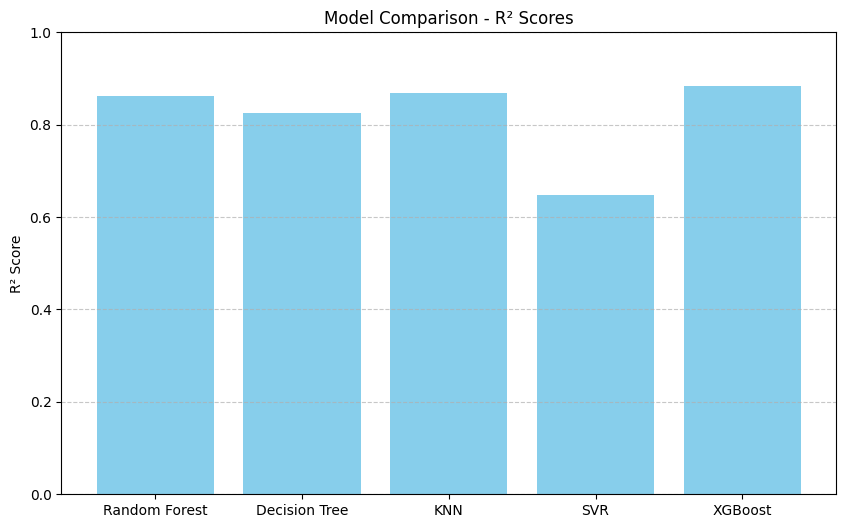

In [30]:
import matplotlib.pyplot as plt
# Comparison Bar Graph for R² Scores
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color="skyblue")
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Scores")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

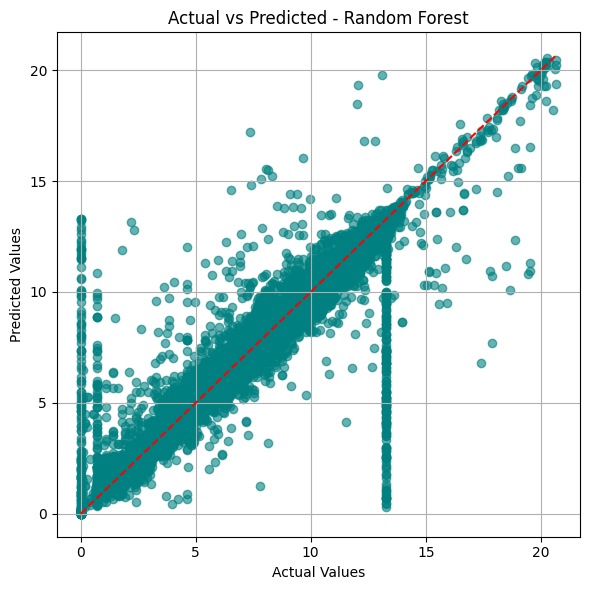

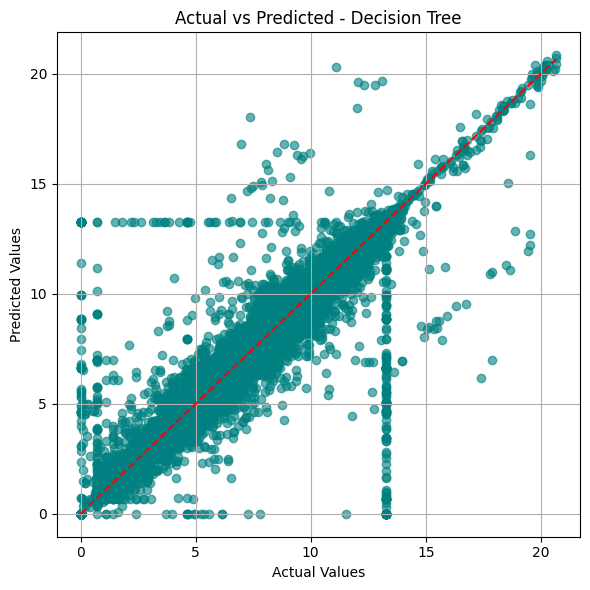

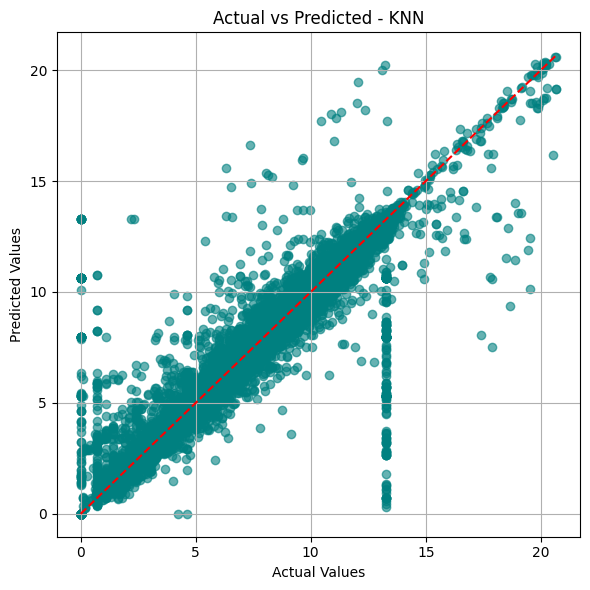

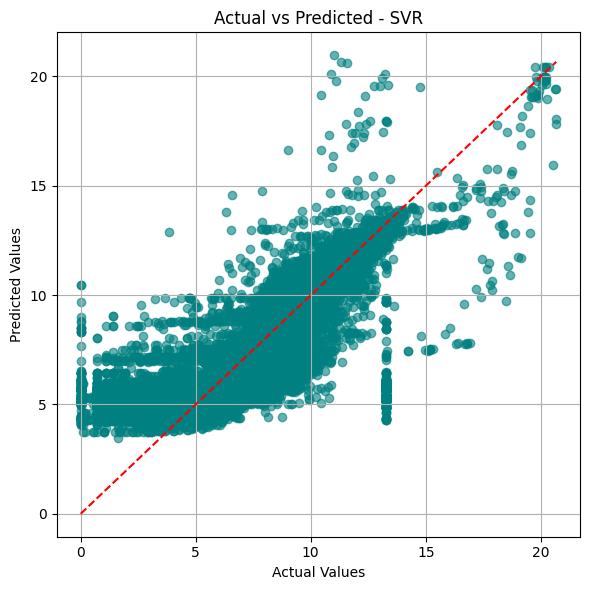

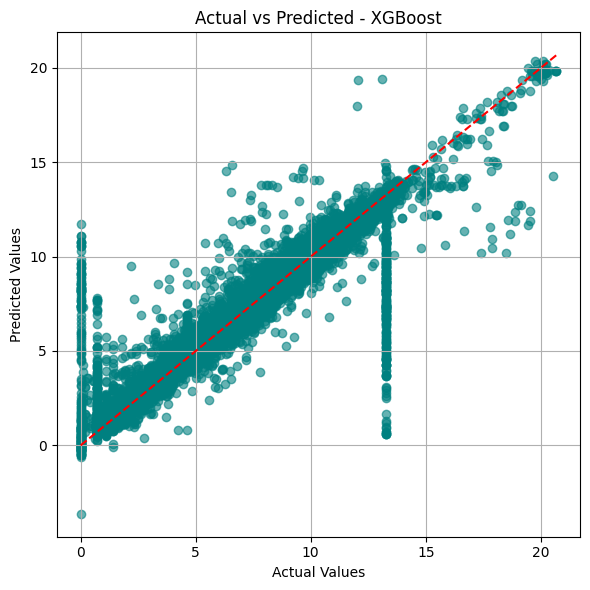

In [31]:
# Actual vs Predicted Plots
for name, y_pred in predictions.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### From the above we can say that XGBoost is the best model as it has high R2 score and low error

#### Storing XGBoost model in .pkl file

In [32]:
import pickle

# Save the XGBoost model to a .pkl file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(models['XGBoost'], file)

#### Storing Standard Scaler in .pkl file

In [33]:
import pickle
# Save the fitted scaler to a .pkl file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Prediction

In [34]:
# Load the trained model and scaler
import joblib
import pandas as pd
model = joblib.load('xgboost_model.pkl') 
scaler = joblib.load('scaler.pkl')

def predict_production():
    print("\nEnter crop details (numeric encoded values):")
    features = [
        int(input("State Name (encoded): ")),
        int(input("Season (encoded): ")),
        int(input("Crop (encoded): ")),
        float(input("Area (hectares): "))
    ]
    
    # Preprocess input
    input_data = pd.DataFrame([features], columns=[
        'State_Name', 'Season', 'Crop', 'Area'
    ])
    scaled_input = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(scaled_input)
    print(f"\nPredicted Production: {prediction[0]:.2f} tonnes")

# Prediction interface
while True:
    predict_production()
    if input("\nPredict again? (y/n): ").lower() != 'y':
        break


Enter crop details (numeric encoded values):


State Name (encoded):  12
Season (encoded):  2
Crop (encoded):  21
Area (hectares):  40



Predicted Production: 0.99 tonnes



Predict again? (y/n):  y



Enter crop details (numeric encoded values):


State Name (encoded):  12
Season (encoded):  2
Crop (encoded):  21
Area (hectares):  40



Predicted Production: 0.99 tonnes



Predict again? (y/n):  160



Predict again? (y/n):  y



Enter crop details (numeric encoded values):


State Name (encoded):  7
Season (encoded):  2
Crop (encoded):  20
Area (hectares):  180



Predicted Production: 6.03 tonnes



Predict again? (y/n):  y



Enter crop details (numeric encoded values):


State Name (encoded):  22
Season (encoded):  1
Crop (encoded):  2
Area (hectares):  20



Predicted Production: 3.21 tonnes



Predict again? (y/n):  n
